<a href="https://colab.research.google.com/github/SanjanaMohan34/mgmt467-analytics-portfolio/blob/Labs/Lab_3_1_Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

- Exploratory data visualisation is used to discover trends or information from the data that we don't yet know.
- It is mostly used by data analysts and the teams that want to learn more information or gain insights from a dataset to better improve processes or gain insoghts.
-Explanatory visualisations are mainly used to communicate findings that have already been discovered. these are mostly used by data analysts to communicate findings to stakeholders or people affected my the data and want to know what we have learnt through the data analuysis process.

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. Bar Chart: It is used for comparasons and categorical data. It usually has a categorical value and a numerical one. Too many categories can make it har to read and sometimes the values on the axes dont start at zero. Some alternatives are tree map, sorted bar chart etc.

2. Line Chart: It shows the trends over time of data. It is hard to visualize too many lines with this graph. instead of this we can also use area charts.


3. Scatter Plot: It shows relationship between two variables, how strong or weak it is. the shape is dots or other symbolbs poloating data points for two variables. Sometimes it causes misinterpretation of correlation and causation and overfitting. as an alternative, we can use bubble charts, hexbin plots etc.

4. Histogram: It shows us the distribution of various numerical variables, the most frequent variables of ranges and the shape of the data values. Some drawbacks include choosing the wrong bin size which can distort how the data is presented in the visualization. Some alternatives include a density plot, box plot etc

5. Map: It shows the geo spatial distribution of data and how it varies across different regions. It can be misleading due to varying population density. Some alternatives include the symbol map, choropleth map etc.

---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**

1.  On-Time Arrival Rate (%)
    * Why it matters: It indicates operational efficiency and customer satisfaction since delays are costly and frustrating.
    * Best chart: Bar chart (by carrier or route), Line chart (over time).
    * Drill-down fields: Carrier, Origin, Destination, Month, Day of Week.

2.  Average Arrival Delay (Minutes)
    * Why it matters: It quantifies the impact of delays and helps identify problematic routes or times.
    * Best chart: Line chart (over time with rolling average), Bar chart (by carrier, origin, or destination), Histogram (distribution of delays).
    * Drill-down fields: Carrier, Origin, Destination, Month, Time of Day.

3.  Load Factor (%)
    * Why it matters: It measures how full the planes are; directly impacts revenue and profitability.
    * Best chart: Line chart (over time), Bar chart (by route or aircraft type).
    * Drill-down fields: Route (Origin-Dest), Aircraft Type, Month, Carrier.

4.  Cost per Available Seat Mile (CASM)
    * Why it matters: It is a key efficiency metric and shows the cost to fly one seat one mile. Lower is generally better.
    * Best chart: Line chart (over time), Bar chart (by aircraft type, route, or carrier).
    * Drill-down fields: Carrier, Route, Aircraft Type, Month, Fuel Price.

5.  KPI: Revenue vs. Cost (Profit/Loss)
    * Why it matters: It is the ultimate measure of financial performance. Executives need to see profitability trends.
    * Best chart: Scatter plot (Revenue vs. Cost per flight/route, perhaps colored by CASM), Line chart (Total Monthly Revenue and Total Monthly Cost).
    * Drill-down fields: Route, Carrier, Month, Fare Class.

---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [1]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [2]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


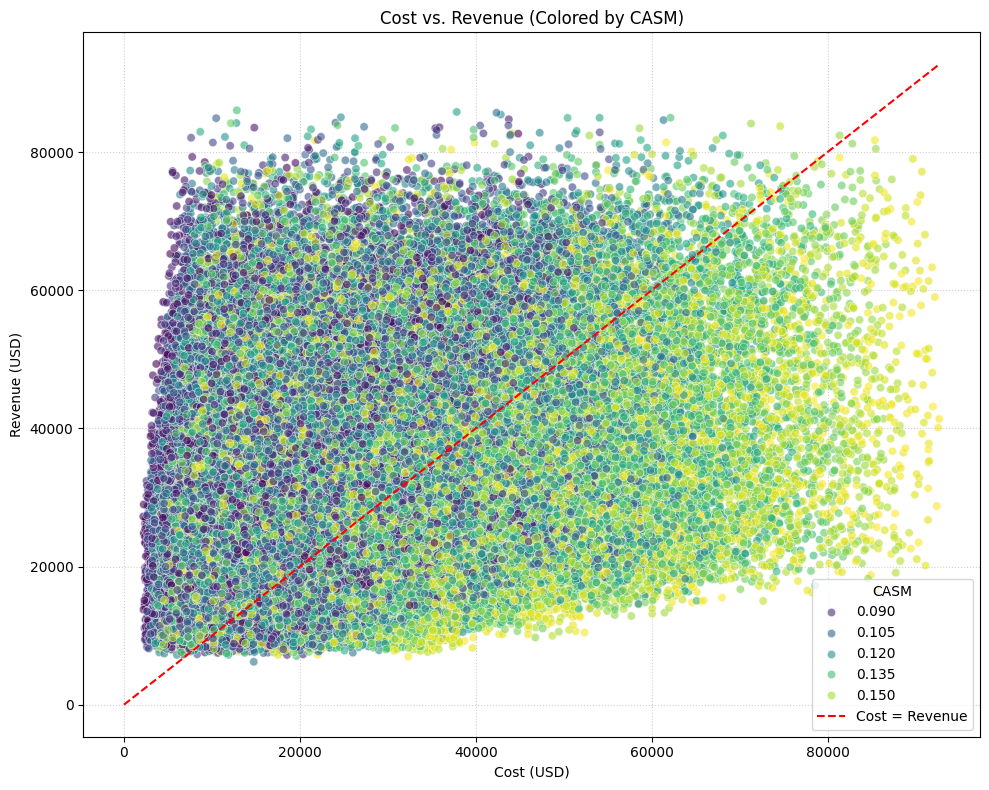

In [8]:
# Plot the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', alpha=0.6)

# Add a diagonal y=x reference line
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Cost = Revenue')

plt.title('Cost vs. Revenue (Colored by CASM)')
plt.xlabel('Cost (USD)')
plt.ylabel('Revenue (USD)')
plt.legend(title='CASM')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

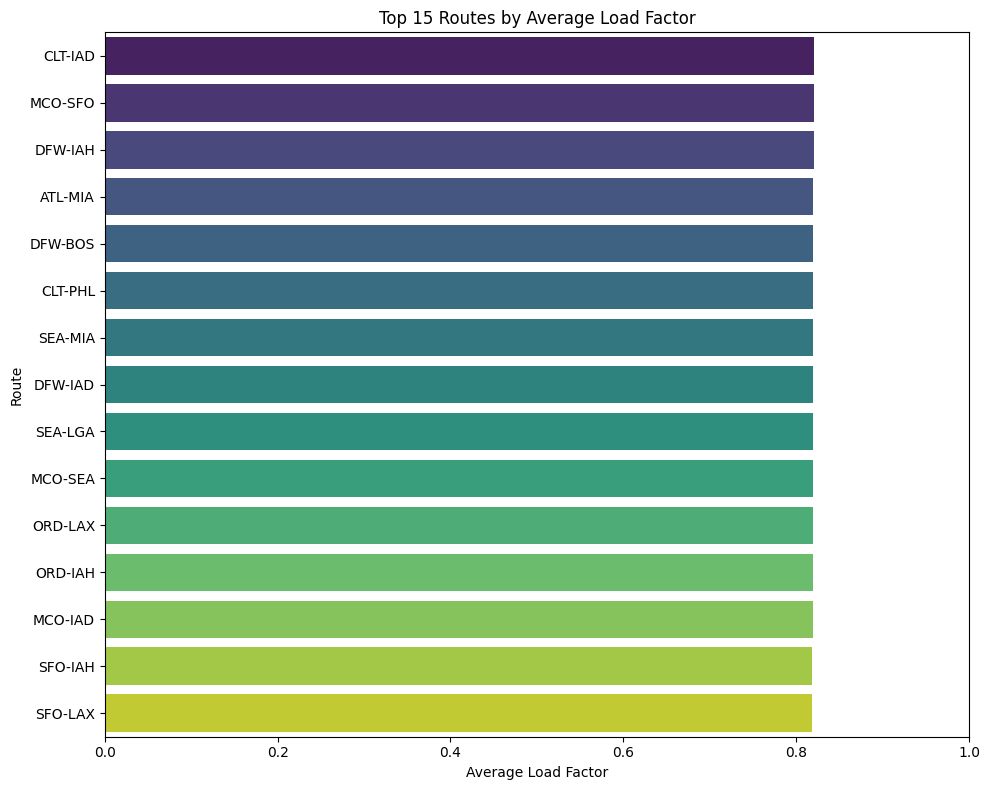

In [7]:
# Compute mean load factor by route
df_flights['route'] = df_flights['origin'] + '-' + df_flights['dest']
mean_load_factor_by_route = df_flights.groupby('route')['load_factor'].mean().sort_values(ascending=False)

# Take the top 15 routes
top_15_routes = mean_load_factor_by_route.head(15)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=top_15_routes.values, y=top_15_routes.index, palette='viridis', hue=top_15_routes.index, legend=False)

plt.title('Top 15 Routes by Average Load Factor')
plt.xlabel('Average Load Factor')
plt.ylabel('Route')
plt.xlim(0, 1) # Load factor is a percentage, so limit x-axis to 0-1
plt.tight_layout()
plt.show()

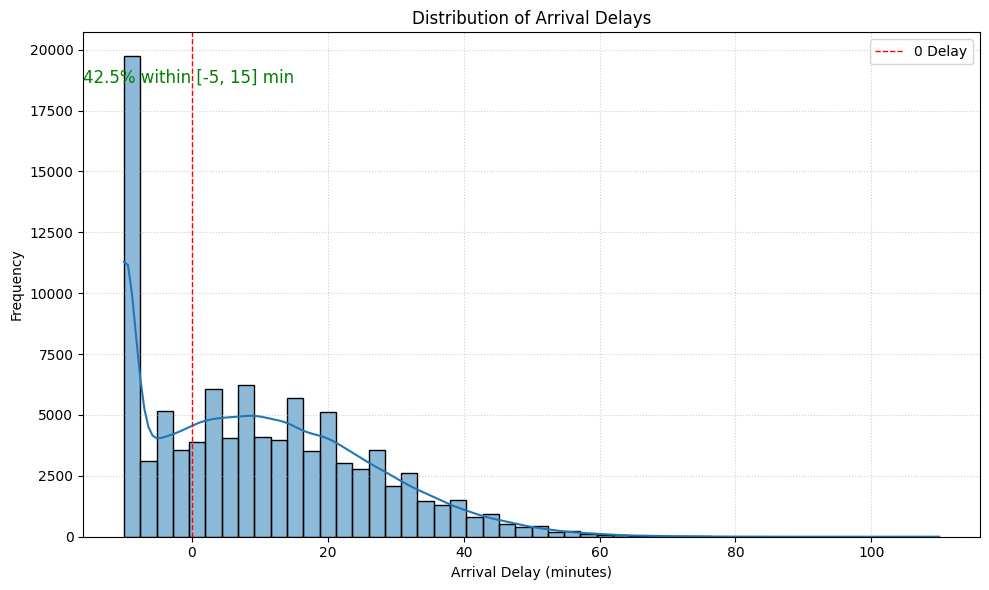

In [6]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=True)

# Add a vertical line at 0 delay
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='0 Delay')

# Calculate percentage of flights within [-5, 15] minutes
on_time_flights = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
percentage_on_time = len(on_time_flights) / len(df_flights) * 100

# Annotate the percentage on the plot
plt.text(15, plt.ylim()[1] * 0.9, f'{percentage_on_time:.1f}% within [-5, 15] min',
         horizontalalignment='right', color='green', fontsize=12)


plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

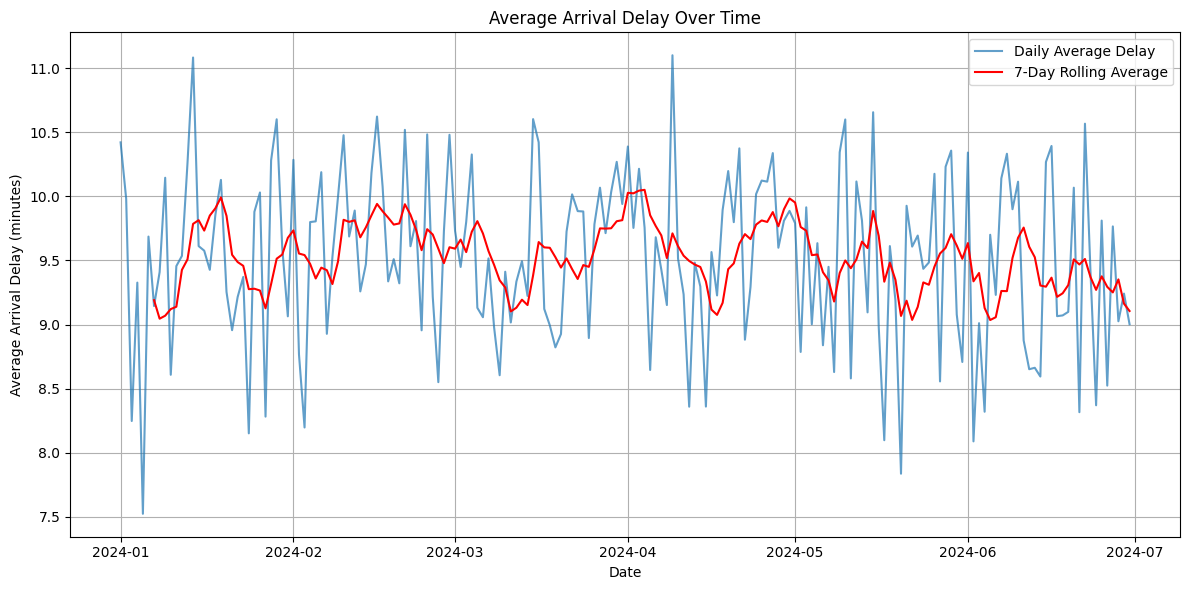

In [5]:
# Aggregate to daily average arrival delay
daily_avg_delay = df_flights.groupby(df_flights['date'].dt.date)['arr_delay_min'].mean()

# Convert the index to datetime objects for rolling average calculation
daily_avg_delay.index = pd.to_datetime(daily_avg_delay.index)

# Calculate 7-day rolling average
rolling_avg_delay = daily_avg_delay.rolling(window=7).mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_delay.index, daily_avg_delay.values, label='Daily Average Delay', alpha=0.7)
plt.plot(rolling_avg_delay.index, rolling_avg_delay.values, label='7-Day Rolling Average', color='red')

plt.title('Average Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (minutes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

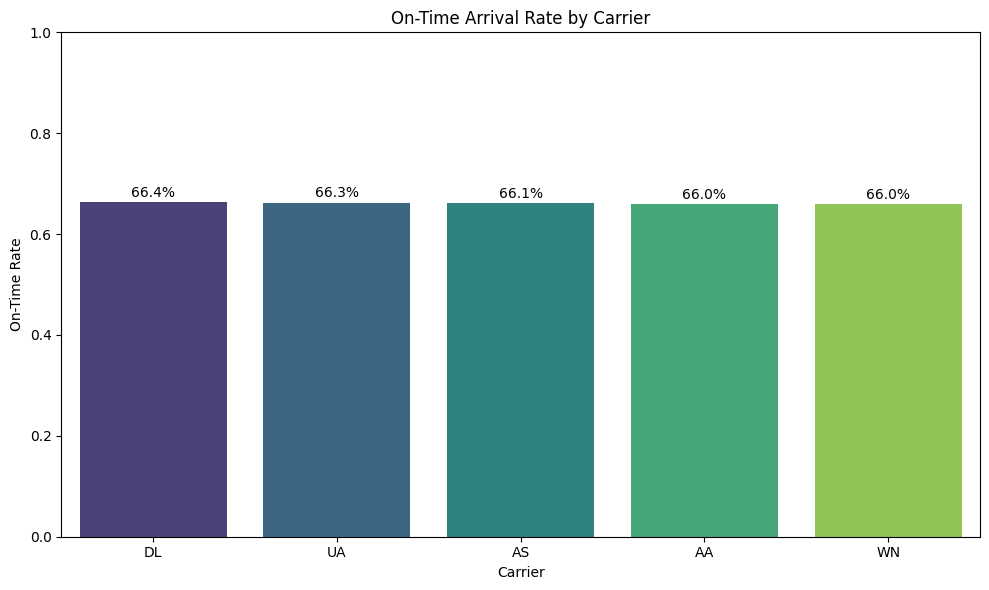

In [4]:
# Calculate on-time rate by carrier
on_time_rate_by_carrier = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, hue=on_time_rate_by_carrier.index, palette='viridis', legend=False)

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01,
            '{:,.1%}'.format(height), ha="center")

plt.title('On-Time Arrival Rate by Carrier')
plt.xlabel('Carrier')
plt.ylabel('On-Time Rate')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 (0% to 100%)
plt.tight_layout()
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
-
-

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
